<a href="https://colab.research.google.com/github/FarooqBaig/Emotion-Detection/blob/main/Copy_of_Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [ ]:
! gdown --id 1HPP0MX4llL2EfgjVZXc8-x0GSe3zjaJh

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HPP0MX4llL2EfgjVZXc8-x0GSe3zjaJh
To: /content/CKPlus1.zip
100% 112M/112M [00:00<00:00, 257MB/s]


In [ ]:
!unzip 'CKPlus1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: CKPlus/modified_images/surprise/surprise_0_9367.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9379.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_938.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9383.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9384.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9385.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9386.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9387.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9392.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9393.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9395.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9398.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9399.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_94.jpg  
  inflating: C

In [ ]:
picture_size = 224
folder_path = "CKPlus/"

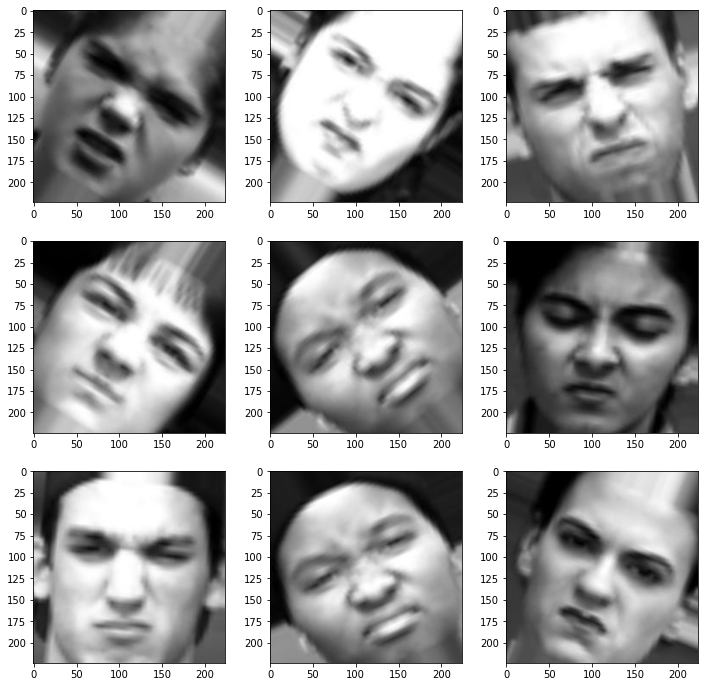

In [ ]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [ ]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"test",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 17365 images belonging to 7 classes.
Found 4707 images belonging to 7 classes.


In [ ]:
no_of_classes=7

model=Sequential()

model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=7, activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
                                

Epoch 1/48
135/135 [==============================] - ETA: 0s - loss: 76.2976 - accuracy: 0.2321

135/135 [==============================] - 290s 2s/step - loss: 76.2976 - accuracy: 0.2321 - val_loss: 1.8410 - val_accuracy: 0.2335 - lr: 0.0010
Epoch 2/48
135/135 [==============================] - ETA: 0s - loss: 2.0247 - accuracy: 0.2265

135/135 [==============================] - 251s 2s/step - loss: 2.0247 - accuracy: 0.2265 - val_loss: 1.8216 - val_accuracy: 0.2635 - lr: 0.0010
Epoch 3/48
135/135 [==============================] - ETA: 0s - loss: 1.4864 - accuracy: 0.4383

135/135 [==============================] - 252s 2s/step - loss: 1.4864 - accuracy: 0.4383 - val_loss: 1.0025 - val_accuracy: 0.6326 - lr: 0.0010
Epoch 4/48
135/135 [==============================] - ETA: 0s - loss: 0.7183 - accuracy: 0.7383

135/135 [==============================] - 251s 2s/step - loss: 0.7183 - accuracy: 0.7383 - val_loss: 0.4545 - val_accuracy: 0.8351 - lr: 0.0010
Epoch 5/48
135/135 [==============================] - ETA: 0s - loss: 0.3181 - accuracy: 0.8836

135/135 [==============================] - 251s 2s/step - loss: 0.3181 - accuracy: 0.8836 - val_loss: 0.2452 - val_accuracy: 0.9086 - lr: 0.0010
Epoch 6/48
135/135 [==============================] - ETA: 0s - loss: 0.1738 - accuracy: 0.9359

135/135 [==============================] - 251s 2s/step - loss: 0.1738 - accuracy: 0.9359 - val_loss: 0.1836 - val_accuracy: 0.9371 - lr: 0.0010
Epoch 7/48
135/135 [==============================] - ETA: 0s - loss: 0.1051 - accuracy: 0.9636

135/135 [==============================] - 251s 2s/step - loss: 0.1051 - accuracy: 0.9636 - val_loss: 0.1033 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 8/48
135/135 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9784

135/135 [==============================] - 251s 2s/step - loss: 0.0646 - accuracy: 0.9784 - val_loss: 0.1053 - val_accuracy: 0.9638 - lr: 0.0010
Epoch 9/48
135/135 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9850

135/135 [==============================] - 251s 2s/step - loss: 0.0445 - accuracy: 0.9850 - val_loss: 0.0549 - val_accuracy: 0.9809 - lr: 0.0010
Epoch 10/48
135/135 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9854

135/135 [==============================] - 251s 2s/step - loss: 0.0436 - accuracy: 0.9854 - val_loss: 0.0886 - val_accuracy: 0.9709 - lr: 0.0010
Epoch 11/48
135/135 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9862

135/135 [==============================] - 251s 2s/step - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.0516 - val_accuracy: 0.9803 - lr: 0.0010
Epoch 12/48
135/135 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9888

135/135 [==============================] - 252s 2s/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.0500 - val_accuracy: 0.9842 - lr: 0.0010
Epoch 13/48
135/135 [==============================] - ETA: 0s - loss: 0.0324 - accuracy: 0.9901

135/135 [==============================] - 251s 2s/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0679 - val_accuracy: 0.9759 - lr: 0.0010
Epoch 14/48
135/135 [==============================] - ETA: 0s - loss: 0.0302 - accuracy: 0.9902

135/135 [==============================] - 251s 2s/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0642 - val_accuracy: 0.9779 - lr: 0.0010
Epoch 15/48
135/135 [==============================] - ETA: 0s - loss: 0.0282 - accuracy: 0.9912

135/135 [==============================] - 251s 2s/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0373 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 16/48
135/135 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9936

135/135 [==============================] - 250s 2s/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.1214 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 17/48
135/135 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9918

135/135 [==============================] - 251s 2s/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0236 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 18/48
135/135 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9948

135/135 [==============================] - 251s 2s/step - loss: 0.0152 - accuracy: 0.9948 - val_loss: 0.0143 - val_accuracy: 0.9952 - lr: 0.0010
Epoch 19/48
135/135 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9944

135/135 [==============================] - 250s 2s/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.0454 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 20/48
135/135 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9938

135/135 [==============================] - 251s 2s/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0341 - val_accuracy: 0.9876 - lr: 0.0010
Epoch 21/48
135/135 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9918Restoring model weights from the end of the best epoch: 18.



Epoch 21: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
135/135 [==============================] - 251s 2s/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.0227 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 21: early stopping


In [ ]:
model.save_weights('face_emotion_model.h5')

In [ ]:
model.save('newmodel.h5')

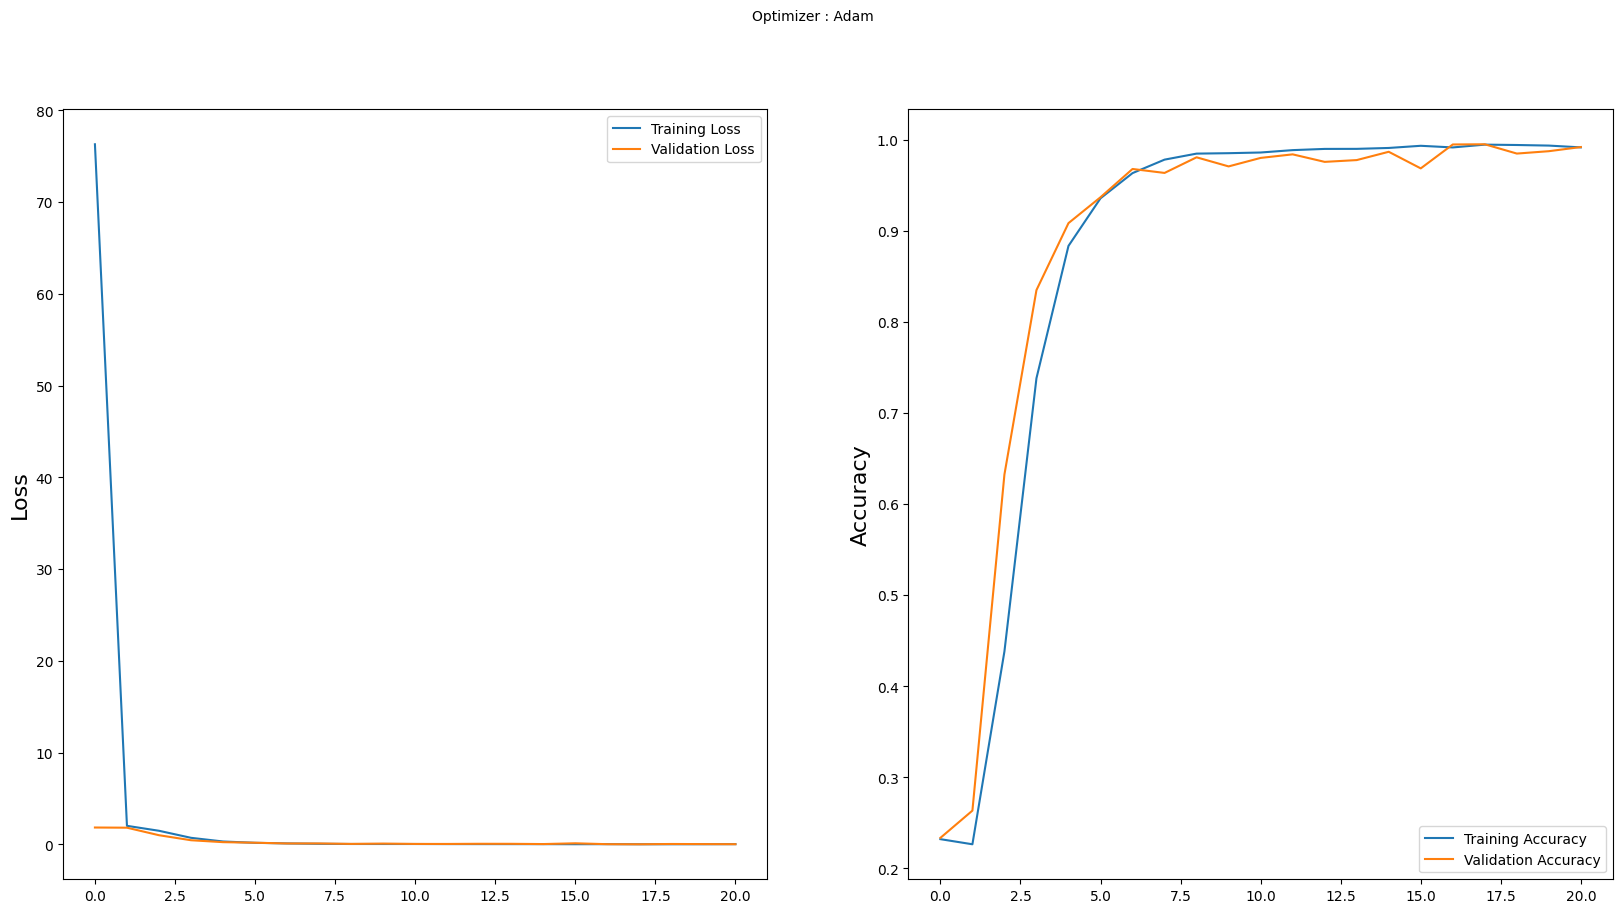

In [ ]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp newmodel.h5 '/content/gdrive/My Drive/'
!ls -lt '/content/gdrive/My Drive/' 

total 6304392
-rw------- 1 root root 1611605768 Nov 17 12:14  newmodel.h5
-rw------- 1 root root  112244696 Nov 17 10:34  CKPlus1.zip
-rw------- 1 root root  169378824 Nov 17 08:39  FER1.zip
-rw------- 1 root root  277231708 Nov 17 07:23  FER.zip
-rw------- 1 root root     820154 Nov 16 02:56  allf.zip
-rw------- 1 root root 1611605768 Nov 15 12:54  accurate_model.h5
-rw------- 1 root root        143 Nov  9 07:58 'MAD LAB INDEX SHEET.gdoc'
-rw------- 1 root root        143 Oct 12 08:51 '18501A0586 MAD Lab Record.gdoc'
-rw------- 1 root root    1984820 Aug 22 09:40  jaswanth.jpg
-rw------- 1 root root       2979 May 19 05:02  10.c
-rw------- 1 root root      30709 May 12  2022 'bnf machine code-converted.docx'
-rw------- 1 root root        283 May 12  2022  ical.lex
-rw------- 1 root root    1056749 Mar 31  2022  CD_LAB_MANUAL.docx
-rw------- 1 root root  711067174 Mar 29  2022  Week1.zip
-rw------- 1 root root  575710262 Mar 29  2022  Week2.zip
-rw------- 1 root root 1370982287 Mar 29 